<h2><a href="https://leetcode.com/problems/course-schedule-ii/?envType=study-plan-v2&envId=graph-theory">210. Course Schedule II</a></h2><h3>Medium</h3><hr><p>There are a total of <code>numCourses</code> courses you have to take, labeled from <code>0</code> to <code>numCourses - 1</code>. You are given an array <code>prerequisites</code> where <code>prerequisites[i] = [a<sub>i</sub>, b<sub>i</sub>]</code> indicates that you <strong>must</strong> take course <code>b<sub>i</sub></code> first if you want to take course <code>a<sub>i</sub></code>.</p>

<ul>
	<li>For example, the pair <code>[0, 1]</code>, indicates that to take course <code>0</code> you have to first take course <code>1</code>.</li>
</ul>

<p>Return <em>the ordering of courses you should take to finish all courses</em>. If there are many valid answers, return <strong>any</strong> of them. If it is impossible to finish all courses, return <strong>an empty array</strong>.</p>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>

<pre>
<strong>Input:</strong> numCourses = 2, prerequisites = [[1,0]]
<strong>Output:</strong> [0,1]
<strong>Explanation:</strong> There are a total of 2 courses to take. To take course 1 you should have finished course 0. So the correct course order is [0,1].
</pre>

<p><strong class="example">Example 2:</strong></p>

<pre>
<strong>Input:</strong> numCourses = 4, prerequisites = [[1,0],[2,0],[3,1],[3,2]]
<strong>Output:</strong> [0,2,1,3]
<strong>Explanation:</strong> There are a total of 4 courses to take. To take course 3 you should have finished both courses 1 and 2. Both courses 1 and 2 should be taken after you finished course 0.
So one correct course order is [0,1,2,3]. Another correct ordering is [0,2,1,3].
</pre>

<p><strong class="example">Example 3:</strong></p>

<pre>
<strong>Input:</strong> numCourses = 1, prerequisites = []
<strong>Output:</strong> [0]
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>1 &lt;= numCourses &lt;= 2000</code></li>
	<li><code>0 &lt;= prerequisites.length &lt;= numCourses * (numCourses - 1)</code></li>
	<li><code>prerequisites[i].length == 2</code></li>
	<li><code>0 &lt;= a<sub>i</sub>, b<sub>i</sub> &lt; numCourses</code></li>
	<li><code>a<sub>i</sub> != b<sub>i</sub></code></li>
	<li>All the pairs <code>[a<sub>i</sub>, b<sub>i</sub>]</code> are <strong>distinct</strong>.</li>
</ul>


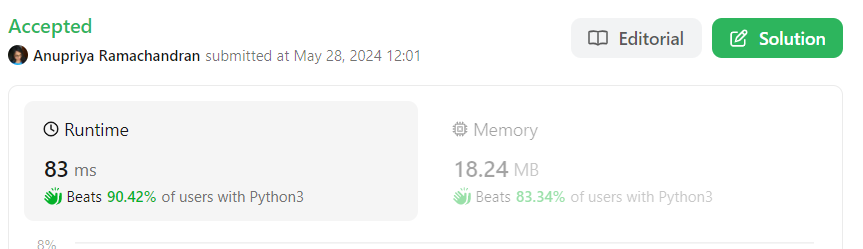

In [1]:
from collections import defaultdict, deque
from typing import List

class Solution:
    def findOrder(self, numCourses: int, prerequisites: List[List[int]]) -> List[int]:

        adj = defaultdict(list)   # Create an ADJACENECY LIST
        for a , b in prerequisites:
            adj[b].append(a)

       
        indegree = [0] * numCourses    # Create INDEGREE array and update indegrees
        for i in range(numCourses):
            for neighbour in adj[i]:
                indegree[neighbour] += 1

        queue = deque()      
        for i in range(numCourses):  # Append all the nodes to queue with indegree as zero
            if indegree[i] == 0:
                queue.append(i)

        courses = []
        while queue:
            node = queue.popleft()
            courses.append(node)

            for neighbour in adj[node]:   # reduce the indegree for children/neighbours of popped node
                indegree[neighbour] -= 1
                if indegree[neighbour] == 0:  # And append to queue if indegree becomes zero
                    queue.append(neighbour)

        if len(courses) == numCourses:
            return courses
        return []